In [1]:
path = %pwd
print(path)

c:\python\20191207-yyyymmdd-第四階段-假日\20200201-day6\PM


In [2]:
import ast , numpy as np
with open('train_data.txt') as f:
    train_data = np.array(ast.literal_eval(f.read())).astype('float32')

with open('train_labels.txt') as f:
    train_labels = np.array(ast.literal_eval(f.read())).astype('int')
    

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_data[2, :, :, :].reshape(28, 28), cmap='gray_r')
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
# 檢查數據狀況
train_data.shape, train_labels.shape, train_labels[:1]

((50, 28, 28, 1), (50, 3), array([[0, 1, 0]]))

In [5]:
# 建立model 
# the Sequential model
# the Model class used with the functional API.

In [6]:
# the Sequential model type II
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D

model = Sequential()
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same', input_shape=(28, 28, 1)) )
model.add( MaxPooling2D(2,2) )
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same') )
model.add( MaxPooling2D(2,2) )
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same') )
model.add( Flatten())

model.add( Dense(32, activation='relu', input_dim=784) )
model.add( Dense(3, activation='softmax') )
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 5)         25        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 5)         105       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 5)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 5)           105       
_________________________________________________________________
flatten_1 (Flatten)          (None, 245)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)               

In [7]:
# dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
# Keras : 2.3.0
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('weights.hdf5', monitor='accuracy', save_best_only=True)
callbacks_list = [checkpoint]

In [8]:
# 編譯
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# <keras.callbacks.callbacks.History at 0x1b93db60748>
history = model.fit(train_data, train_labels, batch_size=10, 
                    epochs=30, 
                    verbose=1, 
                    validation_split=0.2, 
                    callbacks = callbacks_list)

Train on 40 samples, validate on 10 samples
Epoch 1/30
40/40 [==============================] - 2s 57ms/step - loss: 1.0924 - accuracy: 0.3500 - val_loss: 1.0829 - val_accuracy: 0.3000
Epoch 2/30
40/40 [==============================] - 0s 1ms/step - loss: 1.0251 - accuracy: 0.3750 - val_loss: 1.0010 - val_accuracy: 0.4000
Epoch 3/30
40/40 [==============================] - 0s 3ms/step - loss: 0.9716 - accuracy: 0.4750 - val_loss: 0.9254 - val_accuracy: 0.7000
Epoch 4/30
40/40 [==============================] - 0s 2ms/step - loss: 0.9149 - accuracy: 0.6750 - val_loss: 0.8620 - val_accuracy: 0.8000
Epoch 5/30
40/40 [==============================] - 0s 2ms/step - loss: 0.8622 - accuracy: 0.8250 - val_loss: 0.7939 - val_accuracy: 0.8000
Epoch 6/30
40/40 [==============================] - 0s 1ms/step - loss: 0.7971 - accuracy: 0.9000 - val_loss: 0.7286 - val_accuracy: 0.8000
Epoch 7/30
40/40 [==============================] - 0s 1ms/step - loss: 0.7245 - accuracy: 0.9000 - val_loss: 0.665

In [9]:
# <keras.callbacks.callbacks.History at 0x1b93db60748>
history.history.keys()
# history.history.get('loss'), history.history.get('accuracy')

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

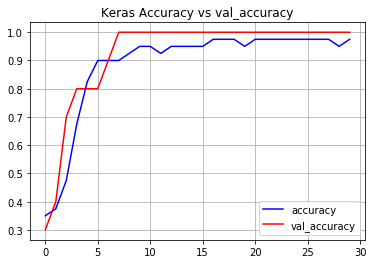

In [10]:
import matplotlib.pyplot as plt
plt.title('Keras Accuracy vs val_accuracy')

plt.plot(history.history.get('accuracy'), color='blue')
plt.plot(history.history.get('val_accuracy'), color='red')
plt.legend(['accuracy', 'val_accuracy'])

plt.grid()
plt.show()

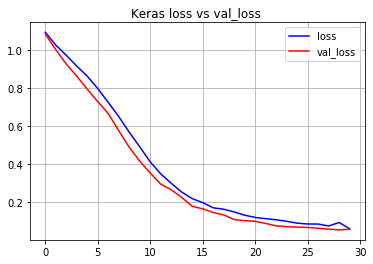

In [11]:
import matplotlib.pyplot as plt
plt.title('Keras loss vs val_loss ')
plt.plot(history.history.get('loss'), color='blue')
plt.plot(history.history.get('val_loss'), color='red')
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()

In [12]:
model.evaluate(train_data, train_labels)[1] * 100.0

50/50 [==============================] - 1s 11ms/step


98.00000190734863